Importando bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Adiciona caminho do dataset

In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Projeto Internações/Preparação dos dados/dataset_internacoes_completo.csv')

In [5]:
dataset

,Qtd. internacoes,Data completa,UF,Município,populacao
0,14,2010-01-01,AC,ACRELÂNDIA,13081.0
1,7,2010-01-01,AC,ASSIS BRASIL,6335.0
2,48,2010-01-01,AC,BRASILÉIA,22325.0
3,2,2010-01-01,AC,BUJARI,8838.0
4,4,2010-01-01,AC,CAPIXABA,9179.0
...,...,...,...,...,...
1024875,28,2024-04-01,TO,TOCANTINÓPOLIS,23102.0
1024876,1,2024-04-01,TO,TUPIRAMA,1608.0
1024877,1,2024-04-01,TO,TUPIRATINS,2142.0
1024878,12,2024-04-01,TO,WANDERLÂNDIA,11216.0


In [6]:
dataset['populacao'].dtype

dtype('float64')

In [7]:
def porte(populacao):
  if populacao <= 20000:
    return 'Pequeno Porte I'
  elif populacao >= 20001 and populacao <= 50000 :
    return 'Pequeno Porte II'
  elif populacao >= 50001 and populacao <= 100000:
    return 'Médio Porte'
  elif populacao >= 100001 and populacao <= 900000:
    return 'Grande Porte'
  elif populacao >= 900001:
    return 'Metrópole'

In [8]:
def taxa_internacao (row):
  return row['Qtd. internacoes']*1000/row['populacao']

In [ ]:
dataset['taxa_internacao'] = dataset.apply(taxa_internacao, axis =1)

In [ ]:
dataset['Porte'] = dataset['populacao'].apply(porte)

In [ ]:
dataset

,Qtd. internacoes,Data completa,UF,Município,populacao,taxa_internacao,Porte
0,14,2010-01-01,AC,ACRELÂNDIA,13081.0,1.070255,Pequeno Porte I
1,7,2010-01-01,AC,ASSIS BRASIL,6335.0,1.104972,Pequeno Porte I
2,48,2010-01-01,AC,BRASILÉIA,22325.0,2.150056,Pequeno Porte II
3,2,2010-01-01,AC,BUJARI,8838.0,0.226296,Pequeno Porte I
4,4,2010-01-01,AC,CAPIXABA,9179.0,0.435777,Pequeno Porte I
...,...,...,...,...,...,...,...
1024875,28,2024-04-01,TO,TOCANTINÓPOLIS,23102.0,1.212016,Pequeno Porte II
1024876,1,2024-04-01,TO,TUPIRAMA,1608.0,0.621891,Pequeno Porte I
1024877,1,2024-04-01,TO,TUPIRATINS,2142.0,0.466853,Pequeno Porte I
1024878,12,2024-04-01,TO,WANDERLÂNDIA,11216.0,1.069900,Pequeno Porte I


Filtra dataset por médio porte

In [ ]:
dataset = dataset[dataset['Porte'] == 'Médio Porte']


In [ ]:
dataset

,Qtd. internacoes,Data completa,UF,Município,populacao,taxa_internacao,Porte
5,249,2010-01-01,AC,CRUZEIRO DO SUL,81907.0,3.040033,Médio Porte
36,54,2010-01-01,AL,CAMPO ALEGRE,52041.0,1.037643,Médio Porte
45,55,2010-01-01,AL,CORURIPE,53387.0,1.030213,Médio Porte
88,64,2010-01-01,AL,PALMEIRA DOS ÍNDIOS,72064.0,0.888099,Médio Porte
94,138,2010-01-01,AL,PENEDO,61834.0,2.231782,Médio Porte
...,...,...,...,...,...,...,...
1024719,133,2024-04-01,SP,UBATUBA,80781.0,1.646427,Médio Porte
1024734,59,2024-04-01,SP,VINHEDO,65209.0,0.904783,Médio Porte
1024739,69,2024-04-01,SP,VOTUPORANGA,86820.0,0.794748,Médio Porte
1024799,75,2024-04-01,TO,GURUPI,78394.0,0.956706,Médio Porte


In [ ]:
time_series = dataset[['Data completa', 'taxa_internacao']]
time_series['Data completa'] = pd.to_datetime(time_series['Data completa'])

<ipython-input-13-8980fe5bf9f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['Data completa'] = pd.to_datetime(time_series['Data completa'])


In [ ]:
time_series = time_series.set_index('Data completa').resample('M').mean()

In [ ]:
time_series.describe()

,taxa_internacao
count,172.000000
mean,0.942549
std,0.158905
min,0.526011
25%,0.877611
50%,0.932646
75%,1.053317
max,1.276683


array([[<Axes: title={'center': 'taxa_internacao'}>]], dtype=object)

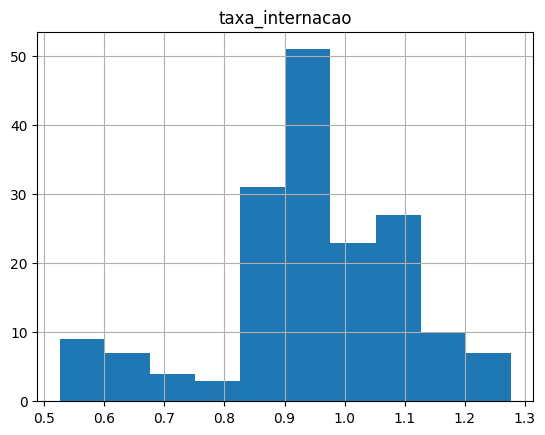

In [ ]:
time_series.hist()

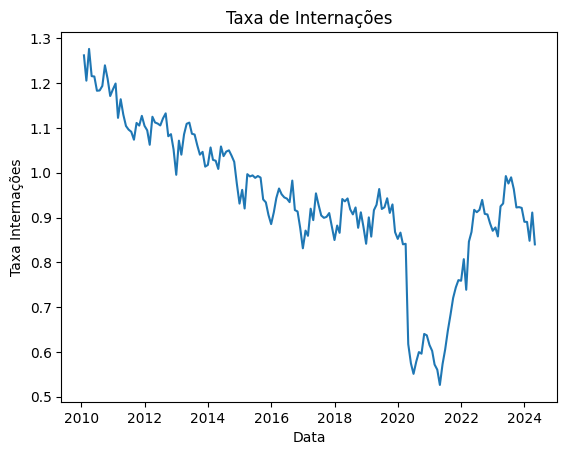

In [ ]:
plt.plot(time_series)
plt.title('Taxa de Internações')
plt.ylabel('Taxa Internações')
plt.xlabel('Data')
plt.show()

[texto do link](https://)#Decomposição da série

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(time_series, model='aditive')

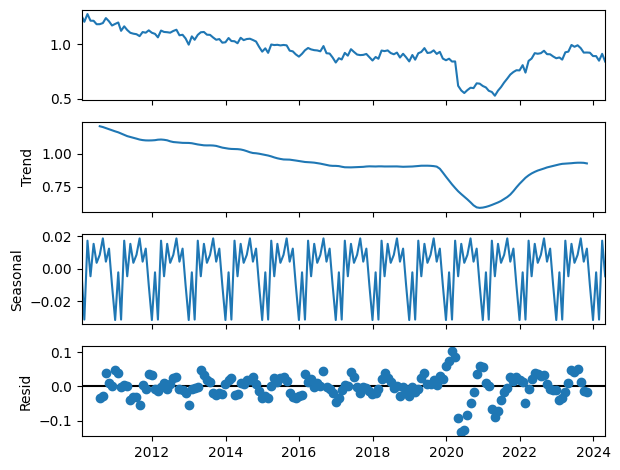

In [ ]:
result.plot()
plt.show()

#Teste de Estacionariedade

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
X = time_series['taxa_internacao']
result = adfuller(X)
print('ADF Estatíticas: %f' % result[0])
print('Valor de P: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Estatíticas: -1.897543
Valor de P: 0.333218
Valores Críticos:
	1%: -3.472
	5%: -2.880
	10%: -2.577


#Tornando a série estacionária (Diferenciação)

In [ ]:
xdiff = X.diff()
xdiff = xdiff.dropna()

<Axes: xlabel='Data completa'>

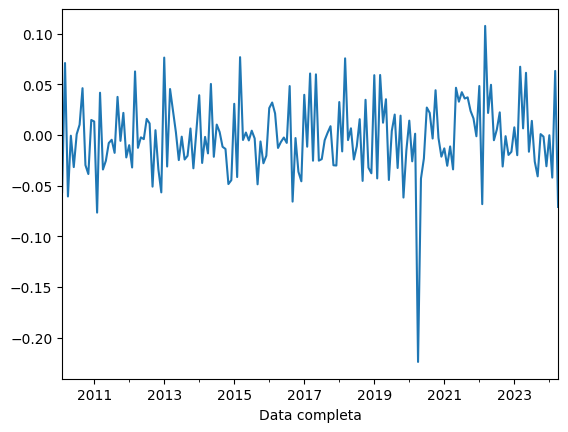

In [ ]:
xlabel='Data'
xdiff.plot()

In [ ]:
result = adfuller(xdiff)
print('ADF Estatíticas: %f' % result[0])
print('Valor de P: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Estatíticas: -3.073407
Valor de P: 0.028585
Valores Críticos:
	1%: -3.472
	5%: -2.880
	10%: -2.577


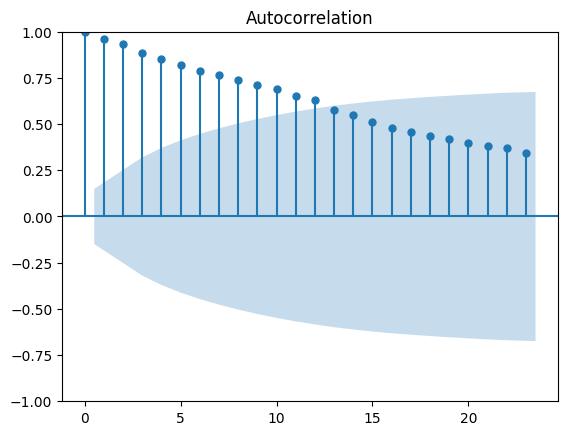

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(X)
plt.show()

In [ ]:
!pip freeze > requirements.txt